In [1]:
#install packages
!pip install flaml

In [4]:
# load all imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
from flaml import AutoML

In [6]:
# data source https://www.kaggle.com/rtatman/188-million-us-wildfires
data = pd.read_csv('fires.csv')

<ipython-input-6-03c3e46369cd>:2: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fires.csv')


In [7]:
data.head()

,1,1.1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest.1,...,A,40.03694444,-121.00583333,5,USFS,CA,63,063,Plumas,Unnamed: 38
0,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5,USFS,CA,61.0,61.0,Placer,NaN
1,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,NaN
2,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5,USFS,CA,3.0,3.0,Alpine,NaN
3,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5,USFS,CA,3.0,3.0,Alpine,NaN
4,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.635278,-120.103611,5,USFS,CA,5.0,5.0,Amador,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880464 entries, 0 to 1880463
Data columns (total 39 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   1                         int64  
 1   1.1                       int64  
 2   FS-1418826                object 
 3   FED                       object 
 4   FS-FIRESTAT               object 
 5   FS                        object 
 6   USCAPNF                   object 
 7   Plumas National Forest    object 
 8   0511                      object 
 9   Plumas National Forest.1  object 
 10  1.2                       object 
 11  PNF-47                    object 
 12  BJ8K                      object 
 13  FOUNTAIN                  object 
 14  Unnamed: 14               object 
 15  Unnamed: 15               object 
 16  Unnamed: 16               object 
 17  Unnamed: 17               object 
 18  Unnamed: 18               object 
 19  2005                      int64  
 20  2453403.5               

In [9]:
data.describe()

,1,1.1,2005,2453403.5,33,1300,9,2453403.5.1,33.1,1730,0.1,40.03694444,-121.00583333,5,063,Unnamed: 38
count,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,997826.000000,1.880464e+06,9.889330e+05,988933.000000,907911.000000,1.880464e+06,1.880464e+06,1.880464e+06,1.880464e+06,1.202316e+06,0.0
mean,9.402335e+05,5.484023e+07,2.003710e+03,2.453064e+06,1.647192e+02,1453.014479,5.979035e+00,2.453238e+06,172.656907,1534.831865,7.452020e+01,3.678121e+01,-9.570493e+01,1.059658e+01,9.578353e+01,NaN
std,5.428433e+05,1.011963e+08,6.663100e+00,2.434574e+03,9.003888e+01,405.961137,3.483860e+00,2.687549e+03,84.320273,432.737884,2.497599e+03,6.139032e+00,1.671694e+01,4.404661e+00,9.861509e+01,NaN
min,2.000000e+00,2.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,0.000000,1.000000e+00,2.448622e+06,1.000000,0.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00,1.000000e+00,NaN
25%,4.701178e+05,5.055008e+05,1.998000e+03,2.451084e+06,8.900000e+01,1240.000000,3.000000e+00,2.450700e+06,102.000000,1310.000000,1.000000e-01,3.281860e+01,-1.103632e+02,8.000000e+00,2.900000e+01,NaN
50%,9.402335e+05,1.067762e+06,2.004000e+03,2.453178e+06,1.640000e+02,1457.000000,5.000000e+00,2.453466e+06,181.000000,1600.000000,1.000000e+00,3.545250e+01,-9.204293e+01,1.400000e+01,6.700000e+01,NaN
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,1708.000000,9.000000e+00,2.455754e+06,232.000000,1810.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01,1.210000e+02,NaN
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,2359.000000,1.300000e+01,2.457392e+06,366.000000,2359.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01,8.100000e+02,NaN


In [10]:
data.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [11]:
print(data.columns)

Index(['1', '1.1', 'FS-1418826', 'FED', 'FS-FIRESTAT', 'FS', 'USCAPNF',
       'Plumas National Forest', '0511', 'Plumas National Forest.1', '1.2',
       'PNF-47', 'BJ8K', 'FOUNTAIN', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', '2005', '2453403.5', '33',
       '1300', '9', 'Miscellaneous', '2453403.5.1', '33.1', '1730', '0.1', 'A',
       '40.03694444', '-121.00583333', '5', 'USFS', 'CA', '63', '063',
       'Plumas', 'Unnamed: 38'],
      dtype='object')


In [12]:
data = data.drop(columns=["1", "1.1"])

In [13]:
data.columns = ["FOD_ID", "FPA_ID", "SOURCESYSTEMTYPE", "SOURCESYSTEM", "NWCGREPORTINGAGENCY", "NWCGREPORTINGUNIT_ID", "SOURCEREPORTINGUNIT_NAME", "LOCALFIREREPORT_ID", "LOCALINCIDENTID", "FIRE_CODE", "FIRE_NAME", "ICS209INCIDENT_NUMBER", "ICS209NAME", "MTBS_ID", "MTBSFIRENAME", "COMPLEX_NAME", "EMPTY", "FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "DISCOVERY_TIME", "STATCAUSECODE", "STATCAUSEDESCR", "CONT_DATE", "CONT_DOY", "CONT_TIME", "FIRE_SIZE", "FIRESIZECLASS", "LATITUDE", "LONGITUDE", "OWNER_CODE", "OWNER_DESCR", "STATE", "DELETE!","DELETE", "DELETE2", "DELETE3"]

In [14]:
data = data.drop(columns=["DELETE!", "DELETE", "DELETE2", "DELETE3"])

In [15]:
data.head()

,FOD_ID,FPA_ID,SOURCESYSTEMTYPE,SOURCESYSTEM,NWCGREPORTINGAGENCY,NWCGREPORTINGUNIT_ID,SOURCEREPORTINGUNIT_NAME,LOCALFIREREPORT_ID,LOCALINCIDENTID,FIRE_CODE,...,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRESIZECLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
0,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,...,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5,USFS,CA
1,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,...,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA
2,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,...,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5,USFS,CA
3,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,...,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5,USFS,CA
4,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,54,8,...,2453187.5,183.0,1600.0,0.10,A,38.635278,-120.103611,5,USFS,CA


In [16]:
print(data.columns)

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'LOCALINCIDENTID',
       'FIRE_CODE', 'FIRE_NAME', 'ICS209INCIDENT_NUMBER', 'ICS209NAME',
       'MTBS_ID', 'MTBSFIRENAME', 'COMPLEX_NAME', 'EMPTY', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE'],
      dtype='object')


<AxesSubplot:xlabel='FIRE_YEAR', ylabel='Count'>

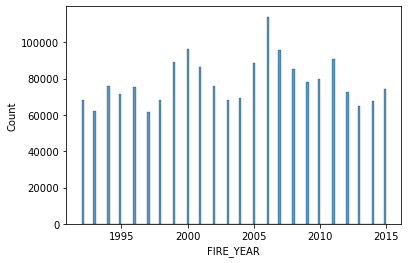

In [17]:
sns.histplot(data["FIRE_YEAR"])

<AxesSubplot:xlabel='DISCOVERY_DOY', ylabel='Count'>

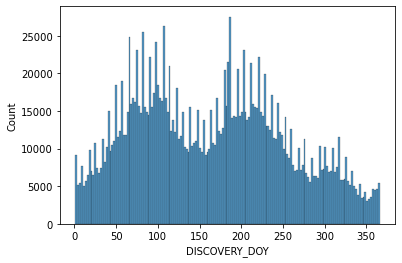

In [18]:
sns.histplot(data["DISCOVERY_DOY"])

In [19]:
data.interpolate

<bound method DataFrame.interpolate of                     FOD_ID  FPA_ID SOURCESYSTEMTYPE SOURCESYSTEM  \
0               FS-1418827     FED      FS-FIRESTAT           FS   
1               FS-1418835     FED      FS-FIRESTAT           FS   
2               FS-1418845     FED      FS-FIRESTAT           FS   
3               FS-1418847     FED      FS-FIRESTAT           FS   
4               FS-1418849     FED      FS-FIRESTAT           FS   
...                    ...     ...              ...          ...   
1880459  2015CAIRS29019636  NONFED         ST-CACDF       ST/C&L   
1880460  2015CAIRS29217935  NONFED         ST-CACDF       ST/C&L   
1880461  2015CAIRS28364460  NONFED         ST-CACDF       ST/C&L   
1880462  2015CAIRS29218079  NONFED         ST-CACDF       ST/C&L   
1880463  2015CAIRS26733926  NONFED         ST-CACDF       ST/C&L   

        NWCGREPORTINGAGENCY      NWCGREPORTINGUNIT_ID  \
0                   USCAENF  Eldorado National Forest   
1                   USCAENF  E

In [21]:
data.isna().sum()


FOD_ID                            0
FPA_ID                            0
SOURCESYSTEMTYPE                  0
SOURCESYSTEM                      0
NWCGREPORTINGAGENCY               0
NWCGREPORTINGUNIT_ID              0
SOURCEREPORTINGUNIT_NAME          0
LOCALFIREREPORT_ID                0
LOCALINCIDENTID             1459286
FIRE_CODE                    820821
FIRE_NAME                   1555741
ICS209INCIDENT_NUMBER        960479
ICS209NAME                  1854747
MTBS_ID                     1854747
MTBSFIRENAME                1869461
COMPLEX_NAME                1869461
EMPTY                       1875281
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
DISCOVERY_TIME               882638
STATCAUSECODE                     0
STATCAUSEDESCR                    0
CONT_DATE                    891531
CONT_DOY                     891531
CONT_TIME                    972553
FIRE_SIZE                         0
FIRESIZECLASS               

In [27]:
data = data.drop(columns=["EMPTY","LOCALINCIDENTID", "FIRE_CODE","FIRE_NAME","ICS209INCIDENT_NUMBER", "ICS209NAME", "MTBS_ID","MTBSFIRENAME","COMPLEX_NAME", "CONT_DATE", "CONT_DOY", "CONT_TIME"])

In [26]:
print(data.columns)

Index(['FOD_ID', 'FPA_ID', 'SOURCESYSTEMTYPE', 'SOURCESYSTEM',
       'NWCGREPORTINGAGENCY', 'NWCGREPORTINGUNIT_ID',
       'SOURCEREPORTINGUNIT_NAME', 'LOCALFIREREPORT_ID', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STATCAUSECODE',
       'STATCAUSEDESCR', 'FIRE_SIZE', 'FIRESIZECLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE'],
      dtype='object')


In [36]:
#split into train and test
train = data[data['FIRE_YEAR'] < 2010]
test = data[data['FIRE_YEAR']>= 2010]

In [37]:
train.shape, test.shape

((1430230, 21), (450234, 21))

In [58]:
#flaml

#automl = AutoML()
X_train = train.loc[:, train.columns!="FIRE_YEAR"]
Y_train = train["FIRE_YEAR"]
X_test = test.loc[:, train.columns!="FIRE_YEAR"]
Y_test = test["FIRE_YEAR"]
num_samples = data.shape[0]
time_horizon = 12
split_idx = num_samples - time_horizon
train_df = data[:split_idx]

In [59]:
train_df

,FOD_ID,FPA_ID,SOURCESYSTEMTYPE,SOURCESYSTEM,NWCGREPORTINGAGENCY,NWCGREPORTINGUNIT_ID,SOURCEREPORTINGUNIT_NAME,LOCALFIREREPORT_ID,FIRE_YEAR,DISCOVERY_DATE,...,DISCOVERY_TIME,STATCAUSECODE,STATCAUSEDESCR,FIRE_SIZE,FIRESIZECLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
0,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453137.5,...,845.0,1,Lightning,0.25,A,38.933056,-120.404444,5,USFS,CA
1,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453156.5,...,1921.0,5,Debris Burning,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA
2,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453184.5,...,1600.0,1,Lightning,0.10,A,38.559167,-119.913333,5,USFS,CA
3,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453184.5,...,1600.0,1,Lightning,0.10,A,38.559167,-119.933056,5,USFS,CA
4,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453186.5,...,1800.0,1,Lightning,0.10,A,38.635278,-120.103611,5,USFS,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880447,2015CAIRS27560317,NONFED,ST-CACDF,ST/C&L,USCALMU,Lassen-Modoc Unit,CALMU,Lassen-Modoc Unit,2015,2457199.5,...,1752.0,1,Lightning,0.05,A,40.443000,-120.664433,13,STATE OR PRIVATE,CA
1880448,2015CAIRS28493610,NONFED,ST-CACDF,ST/C&L,USCAVNC,Ventura County Fire Department,CAVNC,Ventura County Fire Department,2015,2457261.5,...,1737.0,13,Missing/Undefined,0.50,B,34.666666,-119.333333,15,UNDEFINED FEDERAL,CA
1880449,2015CAIRS27653046,NONFED,ST-CACDF,ST/C&L,USCASCU,Santa Clara Unit,CASCU,Santa Clara Unit,2015,2457200.5,...,337.0,7,Arson,0.10,A,38.041150,-121.985283,15,UNDEFINED FEDERAL,CA
1880450,2015CAIRS27458005,NONFED,ST-CACDF,ST/C&L,USCAAEU,Amador-El Dorado Unit,CAAEU,Amador-El Dorado Unit,2015,2457179.5,...,1208.0,2,Equipment Use,1.00,B,38.644183,-120.863673,13,STATE OR PRIVATE,CA


In [60]:
automl = AutoML()

In [61]:
settings = {
    "time_budget": 240,  # total running time in seconds
    "metric": 'mape',  # primary metric for validation: 'mape' is generally used for forecast tasks
    "task": 'ts_forecast',  # task type
    "log_file_name": 'FIRE.log',  # flaml log file
    "eval_method": "holdout",  # validation method can be chosen from ['auto', 'holdout', 'cv']
    "seed": 7654321,  # random seed
}

In [65]:
'''The main flaml automl API'''
automl.fit(X_train, Y_train, time_budget = 60, task = "regression")

[flaml.automl: 11-06 18:49:53] {2600} INFO - task = regression
[flaml.automl: 11-06 18:49:53] {2602} INFO - Data split method: uniform
[flaml.automl: 11-06 18:49:53] {2605} INFO - Evaluation method: holdout
[flaml.automl: 11-06 18:49:53] {2727} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-06 18:49:53] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 11-06 18:49:53] {3164} INFO - iteration 0, current learner lgbm
/Users/diane/opt/anaconda3/lib/python3.8/site-packages/flaml/automl.py:290: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]


OSError: dlopen(/Users/diane/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: '/usr/local/opt/libomp/lib/libomp.dylib'
  Referenced from: '/Users/diane/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so'
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)